<a href="https://colab.research.google.com/github/p65454/ds-section1-sprint1-new/blob/main/AI14_%EC%A1%B0%EC%A0%95%ED%9B%88_section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2 (2).csv


In [3]:
df = pd.read_csv('vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [4]:
df.info()   ## Platform, Year, Genre 에서 결측치 존재. 판매량 자료형 바꿔주는게 계산에 좋다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [5]:
df[df['Year'].isnull()==True]  ##  Year 결측치 확인

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
109,110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,274,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
358,359,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
430,431,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03
...,...,...,...,...,...,...,...,...,...,...
16240,16241,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16275,16276,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16278,16279,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16425,16426,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0


In [6]:
df['Platform'].unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [7]:
df['Publisher'].unique

<bound method Series.unique of 0                          Destineer
1                 Namco Bandai Games
2                          Alchemist
3                          Zoo Games
4                        D3Publisher
                    ...             
16593                  Vivendi Games
16594              Rising Star Games
16595           Take-Two Interactive
16596                     Tecmo Koei
16597    Sony Computer Entertainment
Name: Publisher, Length: 16598, dtype: object>

In [8]:
df_copy = df.copy()    ##복사본 

In [9]:
df_copy.duplicated().sum()   ## 중복치없음

0

In [10]:
df_copy['Publisher'].fillna('Unknown')   ## Genre, Year에 비해서 Publisher가 분석하는데 미치는 영향이 적다고 생각해서 결측치를 Unknown으로 바꿔주고 사용한다
df_copy.dropna(inplace=True)    ## Genre, Year의 결측치는 분석에 방해된다고 생각해서 삭제함
df_copy.reset_index(drop=True,inplace=True)
df_copy

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16236,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16238,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [11]:
df_copy.isnull().sum()  ## 결측치 제거 완료

Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [12]:
df_copy   ## 결측치 제거 후 16241x10 의 데이터

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16236,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16238,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [13]:
df_copy.drop('Unnamed: 0', axis=1, inplace=True)   ## Unnamed: 0 은 불필요하다고 생각해서 삭제함
df_copy.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [14]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [15]:
df_copy.shape

(16241, 9)

In [16]:
import re          
 #  문자,특수문자 있는지 확인 하는 함수
def has_errors(inputString):
  return bool(re.search('[_,!,@,#,$,%,^,&,*,(,),-,+,=,`,~,a-zA-Z]', inputString))

In [17]:
error_condition = df_copy.NA_Sales.apply(has_errors)   ## NA_Sales에 불필요한문자 K M 등이 포함된것 확인.  Sales 항목들의 단위가 M이라고 판단함. K = M/1000 이므로 K로 표현된 데이터에 1000을 나눠서 단위 M으로 맞춰준다음에 문자열K,M을 삭제하자
error_NA_Sales = df_copy[error_condition]
error_NA_Sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06
44,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60K,0.08,0.16,0.03
142,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0K,0.02,0,0
439,Medal of Honor: Warfighter,X360,2012.0,Action,Electronic Arts,0.58M,0.47,0.01,0.1
450,F1 2010,PS3,2010.0,Racing,Codemasters,0.25M,0.76,0.08,0.27
...,...,...,...,...,...,...,...,...,...
15978,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,720K,0.56,0,0.19
16056,NASCAR 06: Total Team Control,PS2,2005.0,Racing,Electronic Arts,0.53M,0.02,0,0.09
16127,Super Robot Taisen F Kanketsuhen,SAT,98.0,Strategy,Banpresto,0M,0,0.55,0
16137,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12


In [18]:
## K를 M단위로 변환하고 K와M을 없애주는 작업 시작 (NA_Sales ~ Other_Sales까지 해준다)

## 1. NA_Sales 

NA_Sales_K = df_copy[df_copy['NA_Sales'].str.contains('K')]   ## NA_Sales에서 K가 포함된 데이터만 추출
NA_Sales_K['NA_Sales'] = NA_Sales_K['NA_Sales'].str.replace('[K]','',regex=True)    ## K를 삭제
NA_Sales_K['NA_Sales'] = pd.to_numeric(NA_Sales_K['NA_Sales'])                      ## 문자열에서 숫자형으로 변경
NA_Sales_K['NA_Sales'] = NA_Sales_K['NA_Sales'].apply(lambda x : x/1000)            ## 단위 M으로 맞춰주기위해 1000으로 나누기
NA_Sales_K

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,0.48,0.33M,0K,0.06
44,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,0.06,0.08,0.16,0.03
142,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0.00,0.02,0,0
866,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009.0,Strategy,Aqua Plus,0.00,0,0.04,0
1071,Pro Evolution Soccer 2014,3DS,2013.0,Action,Konami Digital Entertainment,0.00,0,0.19,0
...,...,...,...,...,...,...,...,...,...
15308,Championship Manager 2010,PC,2009.0,Sports,Eidos Interactive,0.00,0.01,0,0
15846,Vin Diesel: Wheelman,PS3,2009.0,Racing,Ubisoft,0.12,0.15,0,0.06
15978,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,0.72,0.56,0,0.19
16137,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,0.47,0.18,0,0.12


In [19]:
NA_Sales_K = NA_Sales_K.astype(str)  ## 나중에 한번에 숫자로 바꿔주기 위해 다시 str로 바꿔줌

In [20]:
  ## NA_Sales에 K가 들어가는 데이터를 빼준다( 위에 M으로 바꾼 데이터를 다시 넣어주기위해)
df_copy = df_copy[~df_copy['NA_Sales'].str.contains('K')]  
df_copy

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [21]:
# 위의 두 데이터를 합쳐서 단위M으로 수정한 데이터를 만들어준다 ( 인덱스 순서는 바뀌지만 상관없다고 판단함 )
df_copy = pd.concat([df_copy,NA_Sales_K], ignore_index=True)
df_copy['NA_Sales'] = df_copy['NA_Sales'].str.replace('[M]','',regex=True)  ## 이제 M도 필요없으니 제거
df_copy['NA_Sales'] = pd.to_numeric(df_copy['NA_Sales'])   ## 한번더 숫자데이터로 변환
df_copy

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Championship Manager 2010,PC,2009.0,Sports,Eidos Interactive,0.00,0.01,0,0
16237,Vin Diesel: Wheelman,PS3,2009.0,Racing,Ubisoft,0.12,0.15,0,0.06
16238,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,0.72,0.56,0,0.19
16239,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,0.47,0.18,0,0.12


In [22]:
## 2. EU_Sales 
EU_Sales_K = df_copy[df_copy['EU_Sales'].str.contains('K')]   ## EU_Sales에서 K가 포함된 데이터만 추출
EU_Sales_K['EU_Sales'] = EU_Sales_K['EU_Sales'].str.replace('[K]','',regex=True)    ## K를 삭제
EU_Sales_K['EU_Sales'] = pd.to_numeric(EU_Sales_K['EU_Sales'])                      ## 문자열에서 숫자형으로 변경
EU_Sales_K['EU_Sales'] = EU_Sales_K['EU_Sales'].apply(lambda x : x/1000)            ## 단위 M으로 맞춰주기위해 1000으로 나누기

## 나중에 한번에 숫자로 바꿔주기 위해 다시 str로 바꿔줌
EU_Sales_K = EU_Sales_K.astype(str)  

## EU_Sales에 K가 들어가는 데이터를 빼준다( 위에 M으로 바꾼 데이터를 다시 넣어주기위해)
df_copy = df_copy[~df_copy['EU_Sales'].str.contains('K')]  

# 위의 두 데이터를 합쳐서 단위M으로 수정한 데이터를 만들어준다 ( 인덱스 순서는 바뀌지만 상관없다고 판단함 )
df_copy = pd.concat([df_copy,EU_Sales_K], ignore_index=True)
df_copy['EU_Sales'] = df_copy['EU_Sales'].str.replace('[M]','',regex=True)
df_copy['EU_Sales'] = pd.to_numeric(df_copy['EU_Sales'])   ## 한번더 숫자데이터로 변환

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [23]:
## 3. JP_Sales 
JP_Sales_K = df_copy[df_copy['JP_Sales'].str.contains('K')]   ## JP_Sales에서 K가 포함된 데이터만 추출
JP_Sales_K['JP_Sales'] = JP_Sales_K['JP_Sales'].str.replace('[K]','',regex=True)    ## K를 삭제
JP_Sales_K['JP_Sales'] = pd.to_numeric(JP_Sales_K['JP_Sales'])                      ## 문자열에서 숫자형으로 변경
JP_Sales_K['JP_Sales'] = JP_Sales_K['JP_Sales'].apply(lambda x : x/1000)            ## 단위 M으로 맞춰주기위해 1000으로 나누기

## 나중에 한번에 숫자로 바꿔주기 위해 다시 str로 바꿔줌
JP_Sales_K = JP_Sales_K.astype(str)  

## JP_Sales에 K가 들어가는 데이터를 빼준다( 위에 M으로 바꾼 데이터를 다시 넣어주기위해)
df_copy = df_copy[~df_copy['JP_Sales'].str.contains('K')]  

# 위의 두 데이터를 합쳐서 단위M으로 수정한 데이터를 만들어준다 ( 인덱스 순서는 바뀌지만 상관없다고 판단함 )
df_copy = pd.concat([df_copy,JP_Sales_K], ignore_index=True)
df_copy['JP_Sales'] = df_copy['JP_Sales'].str.replace('[M]','',regex=True)
df_copy['JP_Sales'] = pd.to_numeric(df_copy['JP_Sales'])   ## 한번더 숫자데이터로 변환

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [24]:
## 4. Other_Sales 
Other_Sales_K = df_copy[df_copy['Other_Sales'].str.contains('K')]   ## Other_Sales에서 K가 포함된 데이터만 추출
Other_Sales_K['Other_Sales'] = Other_Sales_K['Other_Sales'].str.replace('[K]','',regex=True)    ## K를 삭제
Other_Sales_K['Other_Sales'] = pd.to_numeric(Other_Sales_K['Other_Sales'])                      ## 문자열에서 숫자형으로 변경
Other_Sales_K['Other_Sales'] = Other_Sales_K['Other_Sales'].apply(lambda x : x/1000)            ## 단위 M으로 맞춰주기위해 1000으로 나누기

## 나중에 한번에 숫자로 바꿔주기 위해 다시 str로 바꿔줌
Other_Sales_K = Other_Sales_K.astype(str)  


## Other_Sales에 K가 들어가는 데이터를 빼준다( 위에 M으로 바꾼 데이터를 다시 넣어주기위해)
df_copy = df_copy[~df_copy['Other_Sales'].str.contains('K')]  

# 위의 두 데이터를 합쳐서 단위M으로 수정한 데이터를 만들어준다 ( 인덱스 순서는 바뀌지만 상관없다고 판단함 )
df_copy = pd.concat([df_copy,Other_Sales_K], ignore_index=True)
df_copy['Other_Sales'] = df_copy['Other_Sales'].str.replace('[M]','',regex=True)
df_copy['Other_Sales'] = pd.to_numeric(df_copy['Other_Sales'])   ## 한번더 숫자데이터로 변환

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [25]:
df_copy['EU_Sales'] = pd.to_numeric(df_copy['EU_Sales']) ## 다 숫자데이터로 변환
df_copy['JP_Sales'] = pd.to_numeric(df_copy['JP_Sales'])
df_copy['NA_Sales'] = pd.to_numeric(df_copy['NA_Sales'])
df_copy['Year'] = pd.to_numeric(df_copy['Year'])

In [26]:
df_copy  ## Sales 데이터들이 단위 M으로 정제되었다

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16236,Project Setsuna,PSV,2016.0,Role-Playing,Square Enix,0.00,0.00,0.05,0.00
16237,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,4.18,0.26,0.01,0.08
16238,StarCraft II: Heart of the Swarm,PC,2013.0,Strategy,Activision,0.82,0.65,0.00,0.19
16239,Digimon World 2,PS,2000.0,Role-Playing,Namco Bandai Games,0.23,0.16,0.16,0.04


In [27]:
df_copy.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [28]:
df_copy.describe()   ## Year=0 인 데이터 발견.

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000
mean,1994.178437,0.265195,0.147378,0.078283,0.048234
std,155.484265,0.822431,0.508340,0.309272,0.189678
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


(array([  100.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 16141.]),
 array([   0.,  202.,  404.,  606.,  808., 1010., 1212., 1414., 1616.,
        1818., 2020.]),
 <a list of 10 Patch objects>)

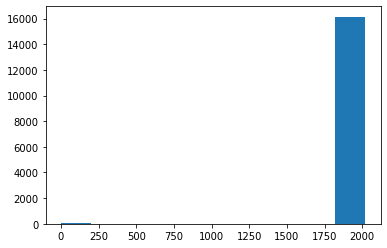

In [29]:
plt.hist(df_copy['Year'])

(array([53., 33.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 13.]),
 array([ 0. ,  9.8, 19.6, 29.4, 39.2, 49. , 58.8, 68.6, 78.4, 88.2, 98. ]),
 <a list of 10 Patch objects>)

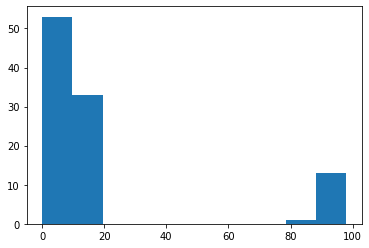

In [30]:
plt.hist(df_copy['Year'][df_copy['Year']<1900])   ## 0~100 사이의 데이터 발견

In [31]:
## Year < 1900 인 데이터 삭제
df_copy = df_copy[df_copy.Year >= 1900]
df_copy.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16141.000000,16141.000000,16141.000000,16141.000000,16141.000000
mean,2006.406356,0.265156,0.147319,0.077951,0.048224
std,5.830780,0.822621,0.508480,0.306771,0.189939
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


In [32]:
df_copy = df_copy[~((df_copy['NA_Sales']==0) & (df_copy['EU_Sales']==0) & (df_copy['JP_Sales']==0) & (df_copy['Other_Sales']==0))].reset_index(drop=True)   ## 판매량이 모두 0이라면 의미없으므로 삭제
df_copy



##    ----------데이터 정제 완료-----------





,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16135,Project Setsuna,PSV,2016.0,Role-Playing,Square Enix,0.00,0.00,0.05,0.00
16136,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,4.18,0.26,0.01,0.08
16137,StarCraft II: Heart of the Swarm,PC,2013.0,Strategy,Activision,0.82,0.65,0.00,0.19
16138,Digimon World 2,PS,2000.0,Role-Playing,Namco Bandai Games,0.23,0.16,0.16,0.04


In [33]:
df_copy.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16140.000000,16140.000000,16140.000000,16140.000000,16140.000000
mean,2006.406258,0.265172,0.147328,0.077956,0.048227
std,5.830947,0.822644,0.508494,0.306779,0.189944
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


In [34]:
df_sales = df_copy[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]   ## 판매량 모은 데이터 추출
df_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0.00,0.00,0.00
1,0.17,0.00,0.00,0.01
2,0.00,0.00,0.02,0.00
3,0.04,0.00,0.00,0.00
4,0.12,0.09,0.00,0.04
...,...,...,...,...
16135,0.00,0.00,0.05,0.00
16136,4.18,0.26,0.01,0.08
16137,0.82,0.65,0.00,0.19
16138,0.23,0.16,0.16,0.04


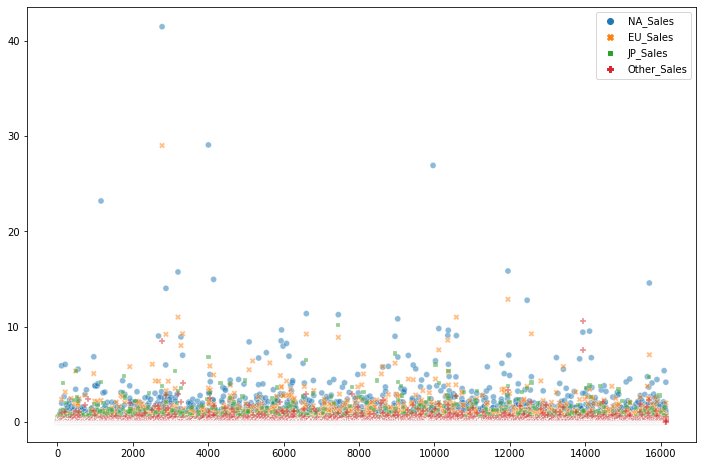

In [35]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.scatterplot(data = df_sales, alpha=0.5)

In [36]:
df_sales_sum = df_sales.sum()
## 비율 구하기
a=0
for i in range(4):
  a += df_sales_sum[i]

In [37]:
per=[]
for i in range(4): 
  per.append(df_sales_sum[i]/a)
print('NA_Sales:',per[0], '\nEU_Sales:',per[1],  '\nJP_Sales:',per[2], '\nOther_Sales:' ,per[3])

## 게임시장 판매량 점유율 NA = 49.2 %   EU = 27.3%   JP = 14.5%   Other = 9%

NA_Sales: 0.49225991592240936 
EU_Sales: 0.2734960060269025 
JP_Sales: 0.14471582119422383 
Other_Sales: 0.08952825685646425


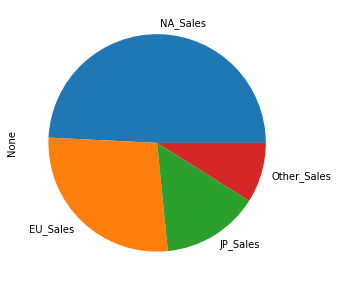

In [38]:
df_sales_sum.plot.pie(y='total sales', figsize=(5, 5))   ## 판매량은 NA > EU > JP > Other 순. NA의 판매량이 약 50%를 차지한다.

(array([1.50e+04, 7.06e+02, 2.27e+02, 9.10e+01, 4.00e+01, 1.80e+01,
        1.00e+01, 1.10e+01, 1.00e+01, 2.00e+00, 7.00e+00, 5.00e+00,
        0.00e+00, 3.00e+00, 0.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        2.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00]),
 array([ 0.    ,  0.8298,  1.6596,  2.4894,  3.3192,  4.149 ,  4.9788,
         5.8086,  6.6384,  7.4682,  8.298 ,  9.1278,  9.9576, 10.7874,
        11.6172, 12.447 , 13.2768, 14.1066, 14.9364, 15.7662, 16.596 ,
        17.4258, 18.2556, 19.0854, 19.9152, 20.745 , 21.5748, 22.4046,
        23.2344, 24.0642, 24.894 , 25.7238, 26.5536, 27.3834, 28.2132,
        29.043 , 29.8728, 30.7026, 31.5324, 32.3622, 33.192 , 34.0218,


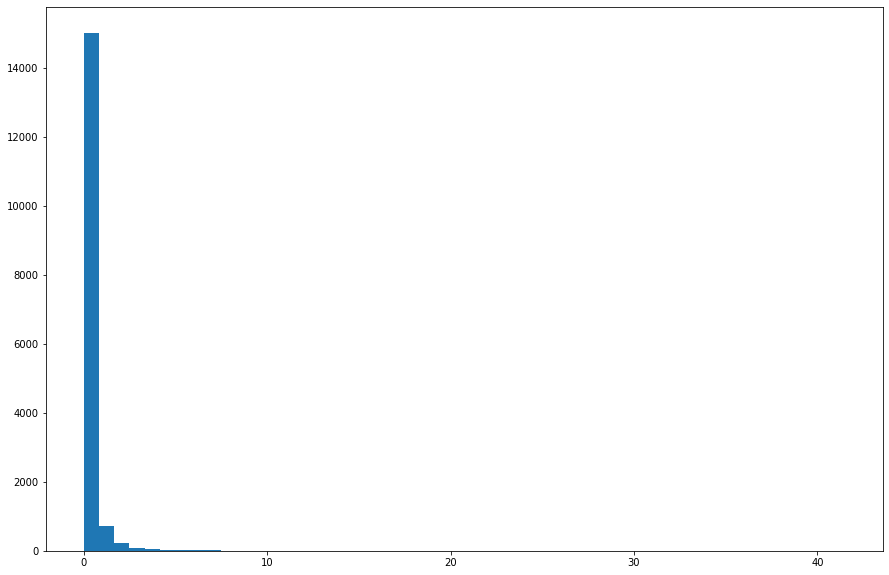

In [39]:
## 나라별 판매량 분포 확인하기
plt.figure(figsize=(15,10))
plt.hist(df_copy['NA_Sales'],bins = 50)

(array([3., 0., 0., 1., 0., 1., 2., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([10.83  , 11.4432, 12.0564, 12.6696, 13.2828, 13.896 , 14.5092,
        15.1224, 15.7356, 16.3488, 16.962 , 17.5752, 18.1884, 18.8016,
        19.4148, 20.028 , 20.6412, 21.2544, 21.8676, 22.4808, 23.094 ,
        23.7072, 24.3204, 24.9336, 25.5468, 26.16  , 26.7732, 27.3864,
        27.9996, 28.6128, 29.226 , 29.8392, 30.4524, 31.0656, 31.6788,
        32.292 , 32.9052, 33.5184, 34.1316, 34.7448, 35.358 , 35.9712,
        36.5844, 37.1976, 37.8108, 38.424 , 39.0372, 39.6504, 40.2636,
        40.8768, 41.49  ]),
 <a list of 50 Patch objects>)

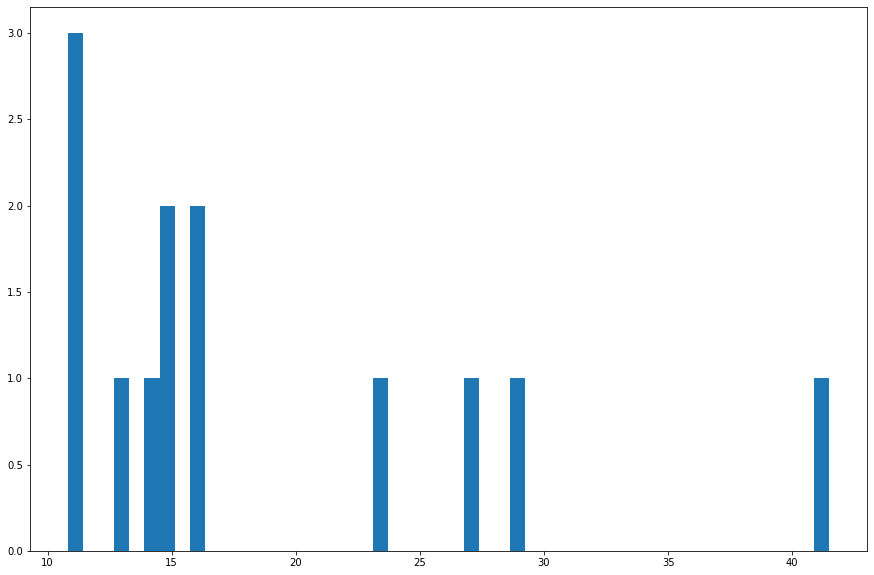

In [40]:
plt.figure(figsize=(15,10))
plt.hist(df_copy['NA_Sales'][df_copy['NA_Sales']>10],bins = 50)

(array([1.5256e+04, 5.3200e+02, 1.5600e+02, 9.0000e+01, 3.7000e+01,
        1.9000e+01, 1.3000e+01, 8.0000e+00, 5.0000e+00, 3.0000e+00,
        7.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00,
        5.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.    ,  0.5804,  1.1608,  1.7412,  2.3216,  2.902 ,  3.4824,
         4.0628,  4.6432,  5.2236,  5.804 ,  6.3844,  6.9648,  7.5452,
         8.1256,  8.706 ,  9.2864,  9.8668, 10.4472, 11.0276, 11.608 ,
        12.1884, 12.7688, 13.3492, 13.9296, 14.51  , 15.0904, 15.6708,
        16.2512, 16.8316, 17.412 ,

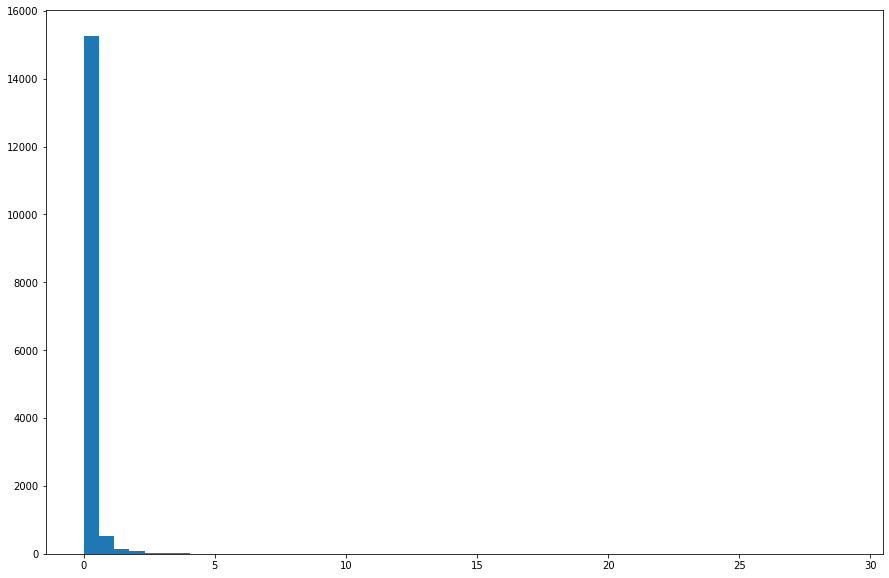

In [41]:
plt.figure(figsize=(15,10))
plt.hist(df_copy['EU_Sales'],bins = 50)

(array([6., 4., 4., 0., 1., 1., 1., 1., 5., 0., 0., 0., 2., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 5.04  ,  5.5196,  5.9992,  6.4788,  6.9584,  7.438 ,  7.9176,
         8.3972,  8.8768,  9.3564,  9.836 , 10.3156, 10.7952, 11.2748,
        11.7544, 12.234 , 12.7136, 13.1932, 13.6728, 14.1524, 14.632 ,
        15.1116, 15.5912, 16.0708, 16.5504, 17.03  , 17.5096, 17.9892,
        18.4688, 18.9484, 19.428 , 19.9076, 20.3872, 20.8668, 21.3464,
        21.826 , 22.3056, 22.7852, 23.2648, 23.7444, 24.224 , 24.7036,
        25.1832, 25.6628, 26.1424, 26.622 , 27.1016, 27.5812, 28.0608,
        28.5404, 29.02  ]),
 <a list of 50 Patch objects>)

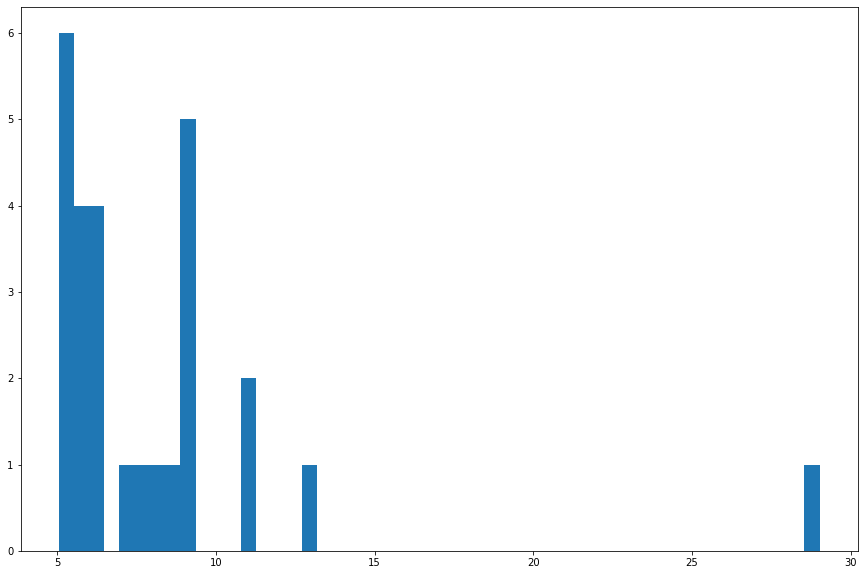

In [42]:
plt.figure(figsize=(15,10))
plt.hist(df_copy['EU_Sales'][df_copy['EU_Sales']>5],bins = 50)

(array([1.4708e+04, 7.1500e+02, 2.8000e+02, 1.3100e+02, 7.8000e+01,
        6.0000e+01, 3.9000e+01, 2.9000e+01, 1.0000e+01, 1.4000e+01,
        1.1000e+01, 7.0000e+00, 7.0000e+00, 9.0000e+00, 4.0000e+00,
        6.0000e+00, 3.0000e+00, 5.0000e+00, 5.0000e+00, 1.0000e+00,
        6.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.    ,  0.2044,  0.4088,  0.6132,  0.8176,  1.022 ,  1.2264,
         1.4308,  1.6352,  1.8396,  2.044 ,  2.2484,  2.4528,  2.6572,
         2.8616,  3.066 ,  3.2704,  3.4748,  3.6792,  3.8836,  4.088 ,
         4.2924,  4.4968,  4.7012,  4.9056,  5.11  ,  5.3144,  5.5188,
         5.7232,  5.9276,  6.132 ,

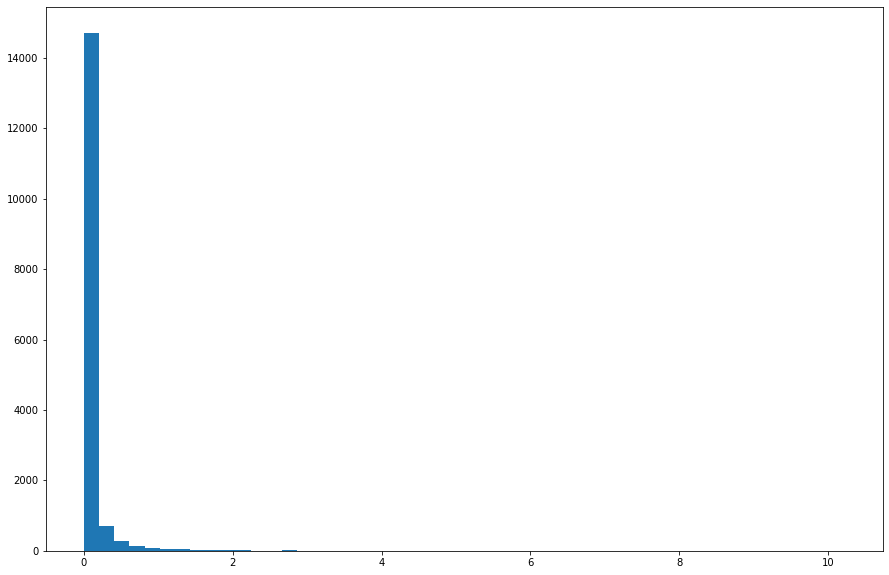

In [43]:
plt.figure(figsize=(15,10))
plt.hist(df_copy['JP_Sales'],bins = 50)

(array([3., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 5.32 ,  5.418,  5.516,  5.614,  5.712,  5.81 ,  5.908,  6.006,
         6.104,  6.202,  6.3  ,  6.398,  6.496,  6.594,  6.692,  6.79 ,
         6.888,  6.986,  7.084,  7.182,  7.28 ,  7.378,  7.476,  7.574,
         7.672,  7.77 ,  7.868,  7.966,  8.064,  8.162,  8.26 ,  8.358,
         8.456,  8.554,  8.652,  8.75 ,  8.848,  8.946,  9.044,  9.142,
         9.24 ,  9.338,  9.436,  9.534,  9.632,  9.73 ,  9.828,  9.926,
        10.024, 10.122, 10.22 ]),
 <a list of 50 Patch objects>)

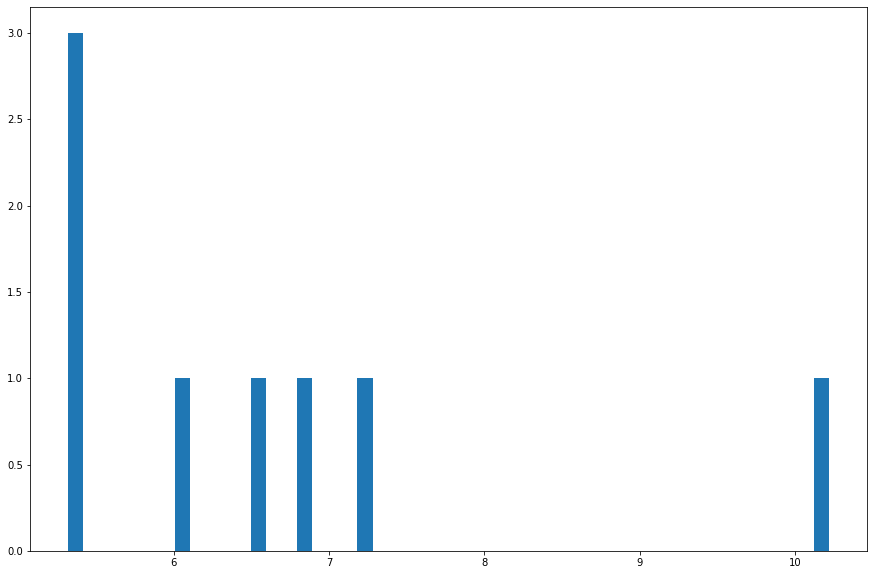

In [44]:
plt.figure(figsize=(15,10))
plt.hist(df_copy['JP_Sales'][df_copy['JP_Sales']>5],bins = 50)

(array([1.5411e+04, 4.4600e+02, 1.1800e+02, 6.8000e+01, 2.8000e+01,
        2.2000e+01, 1.1000e+01, 8.0000e+00, 6.0000e+00, 6.0000e+00,
        4.0000e+00, 2.0000e+00, 0.0000e+00, 4.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.    ,  0.2114,  0.4228,  0.6342,  0.8456,  1.057 ,  1.2684,
         1.4798,  1.6912,  1.9026,  2.114 ,  2.3254,  2.5368,  2.7482,
         2.9596,  3.171 ,  3.3824,  3.5938,  3.8052,  4.0166,  4.228 ,
         4.4394,  4.6508,  4.8622,  5.0736,  5.285 ,  5.4964,  5.7078,
         5.9192,  6.1306,  6.342 ,

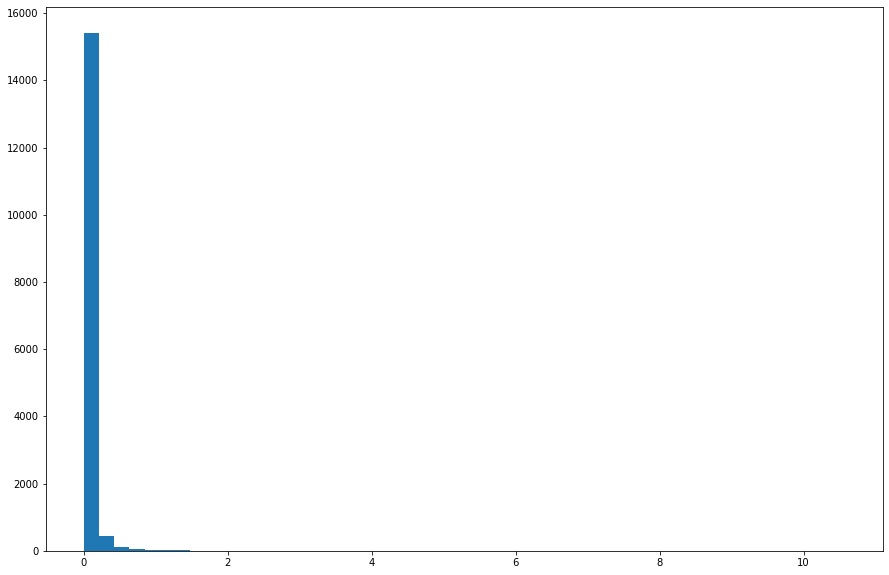

In [45]:
plt.figure(figsize=(15,10))
plt.hist(df_copy['Other_Sales'],bins = 50)

(array([6., 2., 2., 0., 2., 3., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 2.01  ,  2.1812,  2.3524,  2.5236,  2.6948,  2.866 ,  3.0372,
         3.2084,  3.3796,  3.5508,  3.722 ,  3.8932,  4.0644,  4.2356,
         4.4068,  4.578 ,  4.7492,  4.9204,  5.0916,  5.2628,  5.434 ,
         5.6052,  5.7764,  5.9476,  6.1188,  6.29  ,  6.4612,  6.6324,
         6.8036,  6.9748,  7.146 ,  7.3172,  7.4884,  7.6596,  7.8308,
         8.002 ,  8.1732,  8.3444,  8.5156,  8.6868,  8.858 ,  9.0292,
         9.2004,  9.3716,  9.5428,  9.714 ,  9.8852, 10.0564, 10.2276,
        10.3988, 10.57  ]),
 <a list of 50 Patch objects>)

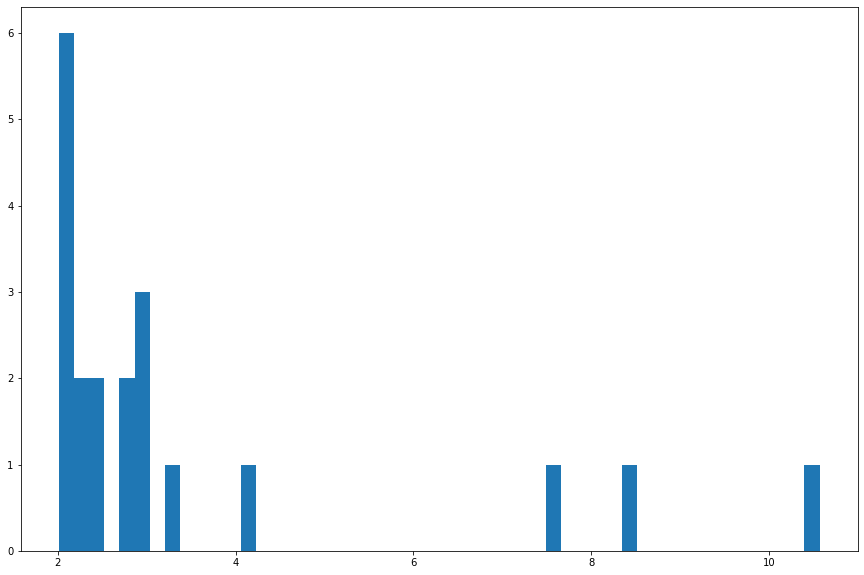

In [46]:
plt.figure(figsize=(15,10))
plt.hist(df_copy['Other_Sales'][df_copy['Other_Sales']>2],bins = 50)

In [47]:
df_Genre = df_copy.groupby('Genre').sum()
df_Genre

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,,
Action,6477518.0,855.96,512.52,155.73,183.64
Adventure,2538280.0,101.33,63.32,51.79,16.64
Fighting,1661830.0,220.11,99.72,86.39,36.10
Misc,3354172.0,394.29,207.68,103.71,72.54
Platform,1733320.0,442.46,199.40,129.22,51.15
Puzzle,1118892.0,121.00,50.39,56.19,12.39
Racing,2421852.0,353.57,234.20,55.42,76.23
Role-Playing,2924257.0,307.08,176.31,336.25,54.71
Shooter,2543486.0,570.89,307.26,37.34,100.82


In [48]:
df_Genre2 = df_Genre.drop('Year',axis=1)    ## 장르별 판매량만 모은 데이터
df_Genre2

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,855.96,512.52,155.73,183.64
Adventure,101.33,63.32,51.79,16.64
Fighting,220.11,99.72,86.39,36.10
Misc,394.29,207.68,103.71,72.54
Platform,442.46,199.40,129.22,51.15
Puzzle,121.00,50.39,56.19,12.39
Racing,353.57,234.20,55.42,76.23
Role-Playing,307.08,176.31,336.25,54.71
Shooter,570.89,307.26,37.34,100.82


In [49]:
##장르별 전체 판매량 추이 조사
##sklearn을 사용하여 PCA 시행

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# StandardScaler()를 사용하여 데이터 표준화 
scaler = StandardScaler()
Z = scaler.fit_transform(df_Genre2)
print("\n Standardized Data: \n", Z)

# 표준화한 데이터에 대하여 pca 시행 
pca = PCA(n_components=4) 
pca.fit(Z)

print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

pca_df = pca.transform(Z)
print("\n Projected Data: \n", pca_df)


 Standardized Data: 
 [[ 2.13755996  2.30823249  0.64328058  2.36495281]
 [-1.09307514 -0.99003794 -0.67086405 -0.96024096]
 [-0.58456787 -0.72276936 -0.23340586 -0.57276629]
 [ 0.1611115   0.06993161 -0.0144239   0.15280294]
 [ 0.36733136  0.00913535  0.30810669 -0.27310062]
 [-1.0088662  -1.08497702 -0.61523353 -1.04486416]
 [-0.01321428  0.26465585 -0.62496887  0.22627579]
 [-0.21224192 -0.16040398  2.92564915 -0.20221625]
 [ 0.91715109  0.80110206 -0.85355974  0.71589564]
 [-0.75182986 -0.62761    -0.52331673 -0.6695354 ]
 [ 1.31717566  1.25949704  0.37587478  1.33135515]
 [-1.23653429 -1.12675609 -0.71713853 -1.06855865]]

 Eigenvectors: 
 [[ 0.562022    0.56521585  0.22064989  0.56211737]
 [-0.11645966 -0.12677446  0.9752297  -0.13889716]
 [ 0.77750634 -0.16359084 -0.01487598 -0.60704253]
 [ 0.25700643 -0.79855952  0.00440065  0.54427108]]

 Eigenvalues: 
 [3.35609713 0.97522114 0.02871409 0.003604  ]

 Projected Data: 
 [[ 3.97732616e+00 -2.42703327e-01 -1.60835624e-01 -3.88809

In [50]:
# 분산 비율 
pca.explained_variance_ratio_

array([0.76910559, 0.22348818, 0.00658031, 0.00082592])

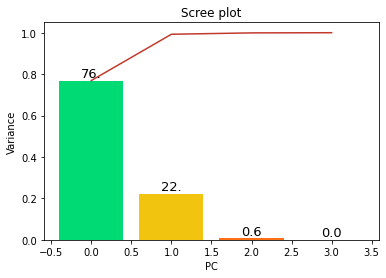

In [51]:
# scree plot으로 나타내는 함수 정의 
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
  
scree_plot(pca)

In [52]:
##2개의 pc만 출력
pca = PCA(2) 
pca.fit(Z)

pca_df = pca.transform(Z)
print("\n Projected Data(Z): \n")
pd.DataFrame(pca_df, columns=['pc1','pc2'])


 Projected Data(Z): 



,pc1,pc2
0,3.977326,-0.242703
1,-1.861712,-0.268061
2,-1.110524,0.011639
3,0.212785,-0.062919
4,0.126081,0.294470
5,-1.903339,-0.199826
6,0.131455,-0.672930
7,0.321927,2.926320
8,1.182334,-1.140223
9,-1.269107,-0.250235


In [53]:
!pip install pca
from pca import pca 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.


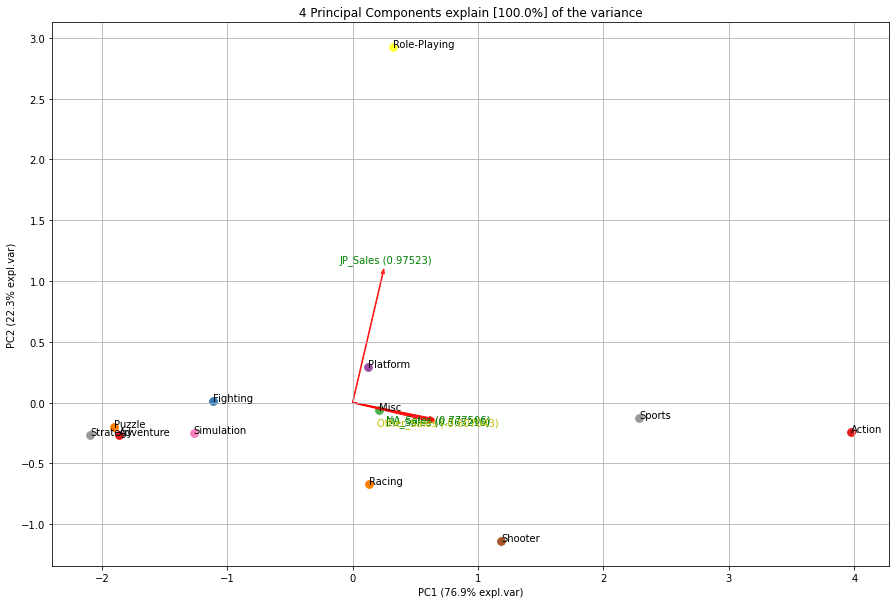

In [54]:
## 4개의 주성분을 pc1을 x축, pc2를 y축으로 해서 biplot 으로 시각화
Z = scaler.fit_transform(df_Genre2)
Z = pd.DataFrame(Z, index=df_Genre2.index, columns=df_Genre2.columns)
model = pca(n_components=4)
results = model.fit_transform(Z)
fig, ax = model.biplot(n_feat=4, legend=False)

## Eigenvalue가 양수였으므로 PC1의 값이 클수록 가장 선호되는 장르이다.
## 세계적으로 봤을때 Action , Sports 장르에서 판매량이 많았다.
## 대부분의 지역에서는 Action, Sports 장르 판매량이 많았지만 JP에서만 Role-Playing 장르 판매량이 현저히 많았다

Text(0.5, 1.0, 'NA')

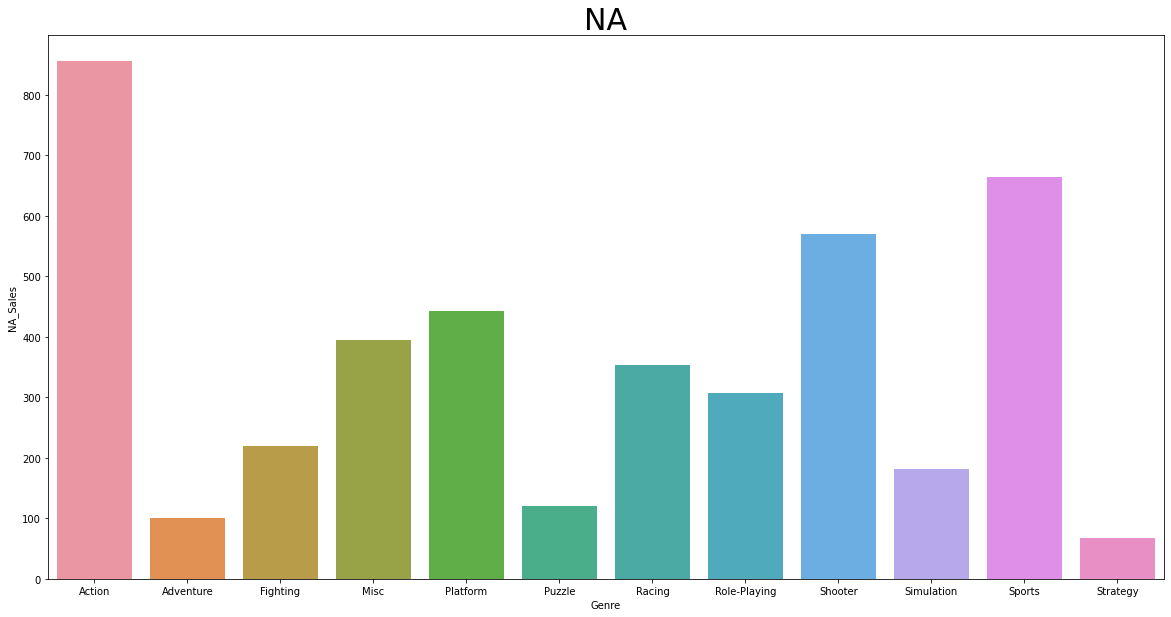

In [55]:
##1.지역에 따라서 선호하는 게임 장르가 다를까


## NA 는 Action를 가장 선호함
plt.figure(figsize=(20,10))
sns.barplot(x=df_Genre2.index, y='NA_Sales', data=df_Genre2)
plt.title('NA',fontsize=30)

Text(0.5, 1.0, 'EU')

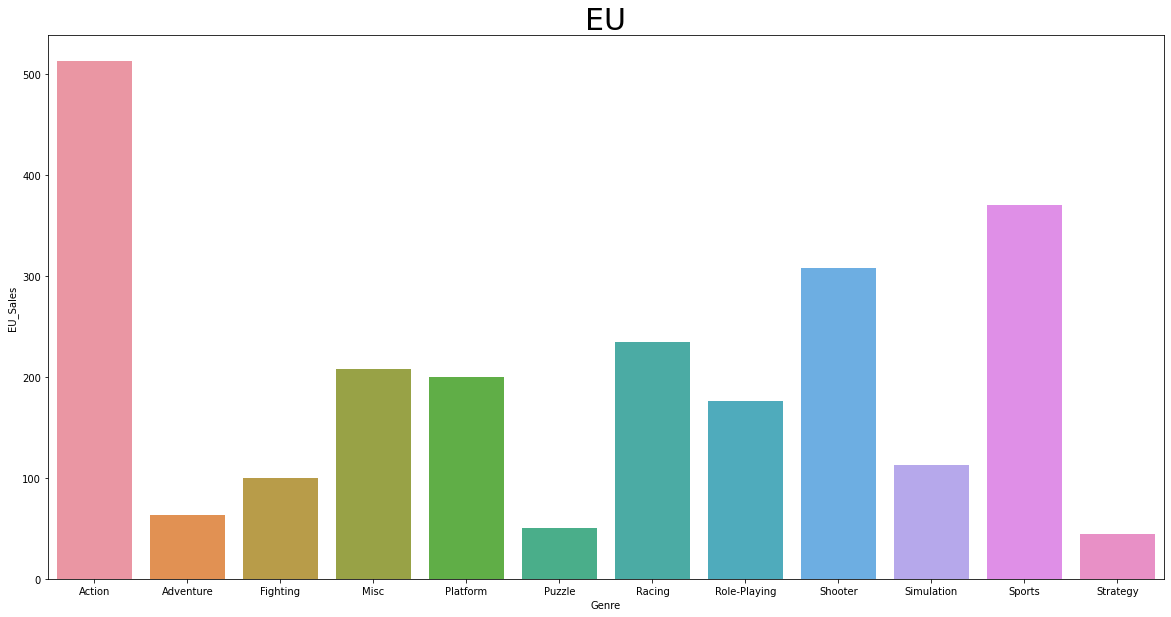

In [56]:
## EU 는 Action 가장 선호함
plt.figure(figsize=(20,10))
sns.barplot(x=df_Genre2.index, y='EU_Sales', data=df_Genre2)
plt.title('EU',fontsize=30)

Text(0.5, 1.0, 'JP')

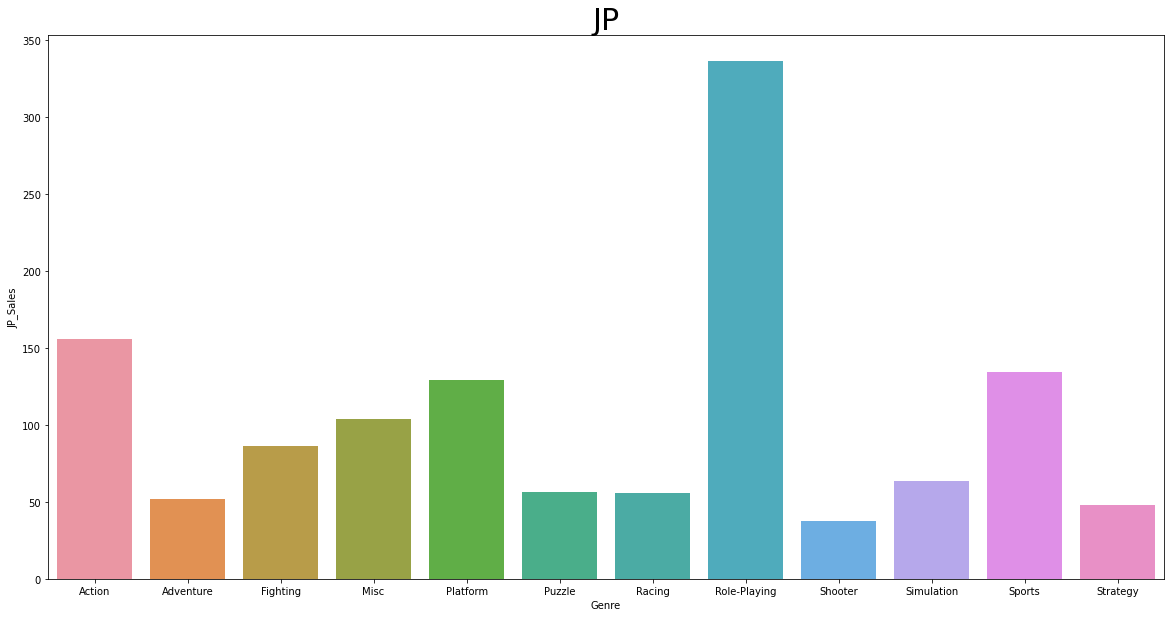

In [57]:
## JP 는 Role-Playing을 가장 선호함
plt.figure(figsize=(20,10))
sns.barplot(x=df_Genre2.index, y='JP_Sales', data=df_Genre2)
plt.title('JP',fontsize=30)

Text(0.5, 1.0, 'Other')

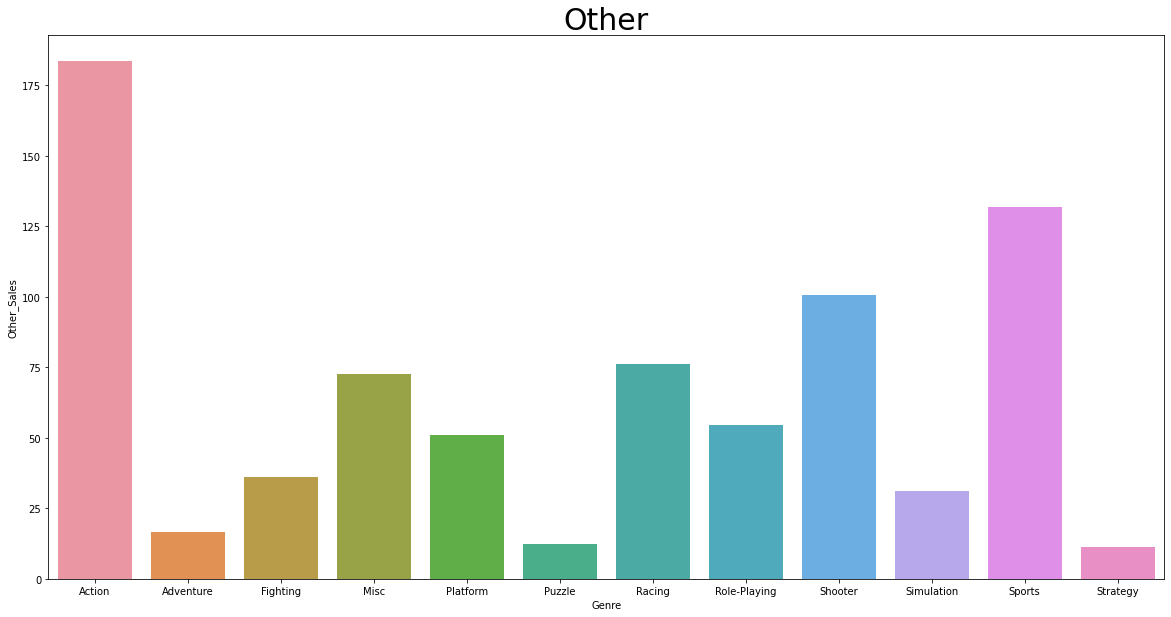

In [58]:
## Other는 Action을 가장 선호함
plt.figure(figsize=(20,10))
sns.barplot(x=df_Genre2.index, y='Other_Sales', data=df_Genre2)
plt.title('Other',fontsize=30)


## 결론 = JP만 Role-Playing 선호하고 다른지역은 Action 선호한다

In [59]:
##연도별 +장르별 판매량 총합 데이터 만들기

df_year = df_copy.groupby(['Year','Genre'],as_index=False).sum()
df_year.head(20)

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1980.0,Action,0.32,0.02,0.0,0.00
1,1980.0,Fighting,0.72,0.04,0.0,0.01
2,1980.0,Misc,2.53,0.15,0.0,0.02
3,1980.0,Shooter,6.56,0.43,0.0,0.08
4,1981.0,Action,13.86,0.81,0.0,0.12
5,1981.0,Platform,6.47,0.37,0.0,0.08
6,1981.0,Puzzle,2.09,0.13,0.0,0.03
7,1981.0,Racing,0.45,0.03,0.0,0.00
8,1981.0,Shooter,9.37,0.56,0.0,0.09
9,1981.0,Simulation,0.42,0.02,0.0,0.00


In [60]:
df_year_1980s = df_year[(df_year['Year']>=1980) & (df_year['Year']<1990)]
df_year_1980s_sum = df_year_1980s.drop('Year',axis=1)
df_year_1980s_sum = df_year_1980s_sum.groupby('Genre').sum()

df_year_1990s = df_year[(df_year['Year']>=1990) & (df_year['Year']<2000)]
df_year_1990s_sum = df_year_1990s.drop('Year',axis=1)
df_year_1990s_sum = df_year_1990s_sum.groupby('Genre').sum()

df_year_2000s = df_year[(df_year['Year']>=2000) & (df_year['Year']<2010)]
df_year_2000s_sum = df_year_2000s.drop('Year',axis=1)
df_year_2000s_sum = df_year_2000s_sum.groupby('Genre').sum()

df_year_2010s = df_year[(df_year['Year']>=2010) & (df_year['Year']<=2020)]
df_year_2010s_sum = df_year_2010s.drop('Year',axis=1)
df_year_2010s_sum = df_year_2010s_sum.groupby('Genre').sum()

Text(0.5, 1.0, '1980s')

<Figure size 1440x504 with 0 Axes>

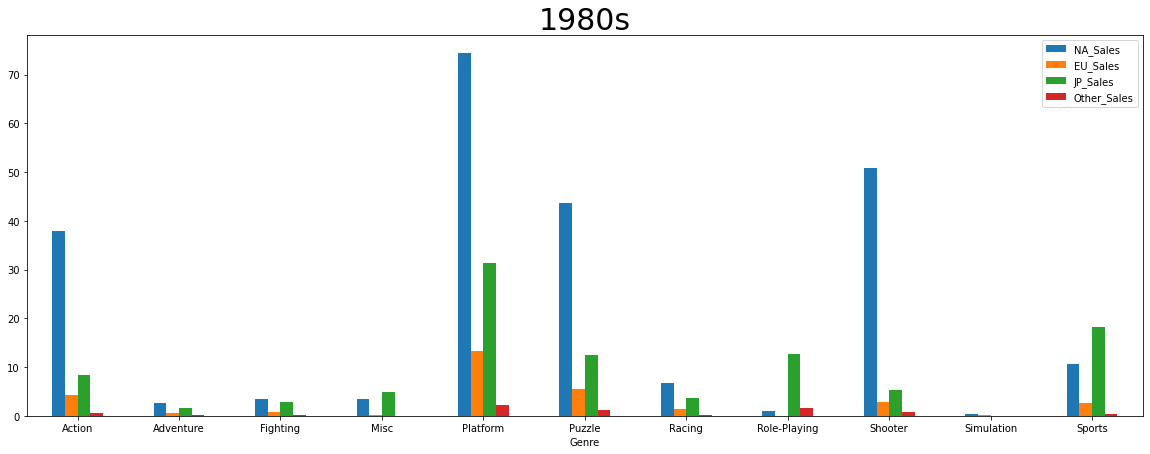

In [61]:
## 2.연도별 게임의 트렌드가 있을까

##연도별 장르 판매량 시각화
## 1980년대는 Platform 강세
plt.figure(figsize=(20,7))
df_year_1980s_sum.plot.bar(rot=0,figsize=(20,7))
plt.title('1980s',fontsize=30)

Text(0.5, 1.0, '1990s')

<Figure size 1440x504 with 0 Axes>

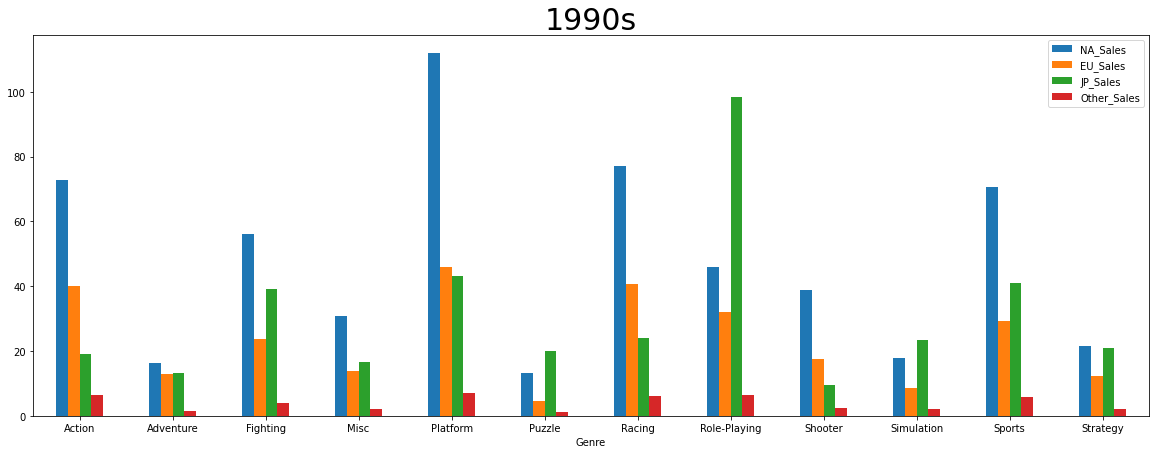

In [62]:
## 1990년대는 Platform 강세
plt.figure(figsize=(20,7))
df_year_1990s_sum.plot.bar(rot=0,figsize=(20,7))
plt.title('1990s',fontsize=30)

Text(0.5, 1.0, '2000s')

<Figure size 1440x504 with 0 Axes>

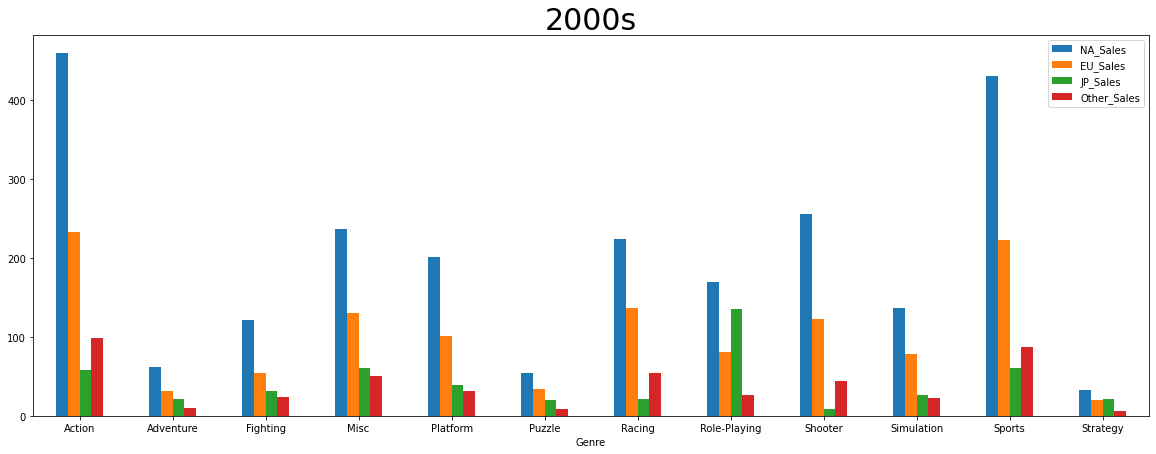

In [63]:
## 2000년대는 Action,Sports강세
plt.figure(figsize=(20,7))
df_year_2000s_sum.plot.bar(rot=0,figsize=(20,7))
plt.title('2000s',fontsize=30)

Text(0.5, 1.0, '2010s')

<Figure size 1440x504 with 0 Axes>

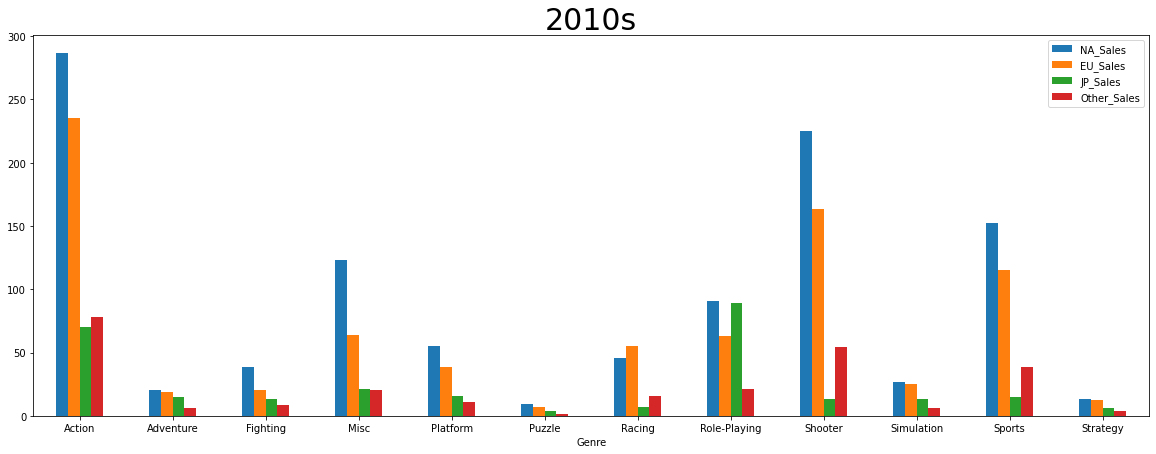

In [64]:
## 2010년대는 Action 강세
plt.figure(figsize=(20,7))
df_year_2010s_sum.plot.bar(rot=0,figsize=(20,7))
plt.title('2010s',fontsize=30)

In [65]:
##3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
df_copy.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16140.000000,16140.000000,16140.000000,16140.000000,16140.000000
mean,2006.406258,0.265172,0.147328,0.077956,0.048227
std,5.830947,0.822644,0.508494,0.306779,0.189944
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


In [66]:
## 각 나라별 75% 이상의 게임들에 대한 데이터만 추출
df_copy_high = df_copy[(df_copy['NA_Sales']>=0.24) & (df_copy['EU_Sales']>=0.11) & (df_copy['JP_Sales']>=0.04) & (df_copy['Other_Sales']>=0.04) ]
df_copy_high = df_copy_high.sort_values(by=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],ascending=False).reset_index(drop=True)
df_copy_high.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77
2,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47
3,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58
4,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31


(array([455., 169.,  92.,  47.,  25.,  13.,   9.,   9.,   5.,   3.,   6.,
          5.,   1.,   2.,   0.,   1.,   1.,   2.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.24 ,  1.065,  1.89 ,  2.715,  3.54 ,  4.365,  5.19 ,  6.015,
         6.84 ,  7.665,  8.49 ,  9.315, 10.14 , 10.965, 11.79 , 12.615,
        13.44 , 14.265, 15.09 , 15.915, 16.74 , 17.565, 18.39 , 19.215,
        20.04 , 20.865, 21.69 , 22.515, 23.34 , 24.165, 24.99 , 25.815,
        26.64 , 27.465, 28.29 , 29.115, 29.94 , 30.765, 31.59 , 32.415,
        33.24 , 34.065, 34.89 , 35.715, 36.54 , 37.365, 38.19 , 39.015,
        39.84 , 40.665, 41.49 ]),
 <a list of 50 Patch objects>)

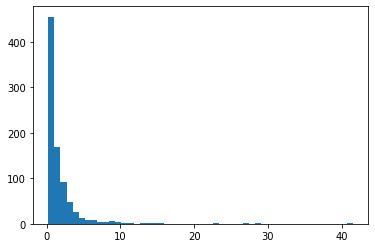

In [67]:
plt.hist(df_copy_high['NA_Sales'],bins=50)

(array([34., 21.,  8., 10.,  9.,  4.,  2.,  7.,  5.,  0.,  3.,  0.,  1.,
         0.,  1.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 3.01  ,  3.7796,  4.5492,  5.3188,  6.0884,  6.858 ,  7.6276,
         8.3972,  9.1668,  9.9364, 10.706 , 11.4756, 12.2452, 13.0148,
        13.7844, 14.554 , 15.3236, 16.0932, 16.8628, 17.6324, 18.402 ,
        19.1716, 19.9412, 20.7108, 21.4804, 22.25  , 23.0196, 23.7892,
        24.5588, 25.3284, 26.098 , 26.8676, 27.6372, 28.4068, 29.1764,
        29.946 , 30.7156, 31.4852, 32.2548, 33.0244, 33.794 , 34.5636,
        35.3332, 36.1028, 36.8724, 37.642 , 38.4116, 39.1812, 39.9508,
        40.7204, 41.49  ]),
 <a list of 50 Patch objects>)

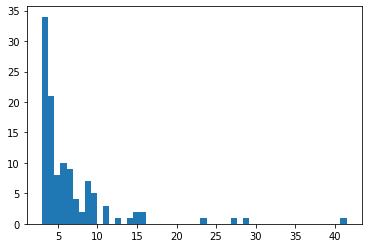

In [68]:
plt.hist(df_copy_high['NA_Sales'][df_copy_high['NA_Sales']>3],bins=50)  

(array([38., 19., 14., 10.,  8.,  5.,  3.,  6.,  0.,  1.,  1.,  1.,  2.,
         4.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 2.01  ,  2.5502,  3.0904,  3.6306,  4.1708,  4.711 ,  5.2512,
         5.7914,  6.3316,  6.8718,  7.412 ,  7.9522,  8.4924,  9.0326,
         9.5728, 10.113 , 10.6532, 11.1934, 11.7336, 12.2738, 12.814 ,
        13.3542, 13.8944, 14.4346, 14.9748, 15.515 , 16.0552, 16.5954,
        17.1356, 17.6758, 18.216 , 18.7562, 19.2964, 19.8366, 20.3768,
        20.917 , 21.4572, 21.9974, 22.5376, 23.0778, 23.618 , 24.1582,
        24.6984, 25.2386, 25.7788, 26.319 , 26.8592, 27.3994, 27.9396,
        28.4798, 29.02  ]),
 <a list of 50 Patch objects>)

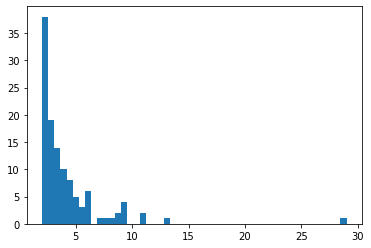

In [69]:
plt.hist(df_copy_high['EU_Sales'][df_copy_high['EU_Sales']>2],bins=50)

(array([54., 40., 33., 11., 16.,  9.,  7., 12.,  7.,  1.,  5.,  7.,  3.,
         4.,  2.,  3.,  4.,  2.,  4.,  3.,  0.,  1.,  0.,  0.,  2.,  1.,
         0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.51  ,  0.7042,  0.8984,  1.0926,  1.2868,  1.481 ,  1.6752,
         1.8694,  2.0636,  2.2578,  2.452 ,  2.6462,  2.8404,  3.0346,
         3.2288,  3.423 ,  3.6172,  3.8114,  4.0056,  4.1998,  4.394 ,
         4.5882,  4.7824,  4.9766,  5.1708,  5.365 ,  5.5592,  5.7534,
         5.9476,  6.1418,  6.336 ,  6.5302,  6.7244,  6.9186,  7.1128,
         7.307 ,  7.5012,  7.6954,  7.8896,  8.0838,  8.278 ,  8.4722,
         8.6664,  8.8606,  9.0548,  9.249 ,  9.4432,  9.6374,  9.8316,
        10.0258, 10.22  ]),
 <a list of 50 Patch objects>)

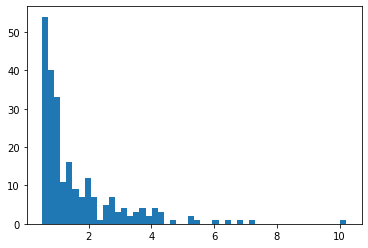

In [70]:
plt.hist(df_copy_high['JP_Sales'][df_copy_high['JP_Sales']>0.5],bins=50)

(array([53., 35., 19., 12.,  7.,  4.,  5.,  4.,  4.,  1.,  0.,  3.,  1.,
         1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.51  ,  0.7112,  0.9124,  1.1136,  1.3148,  1.516 ,  1.7172,
         1.9184,  2.1196,  2.3208,  2.522 ,  2.7232,  2.9244,  3.1256,
         3.3268,  3.528 ,  3.7292,  3.9304,  4.1316,  4.3328,  4.534 ,
         4.7352,  4.9364,  5.1376,  5.3388,  5.54  ,  5.7412,  5.9424,
         6.1436,  6.3448,  6.546 ,  6.7472,  6.9484,  7.1496,  7.3508,
         7.552 ,  7.7532,  7.9544,  8.1556,  8.3568,  8.558 ,  8.7592,
         8.9604,  9.1616,  9.3628,  9.564 ,  9.7652,  9.9664, 10.1676,
        10.3688, 10.57  ]),
 <a list of 50 Patch objects>)

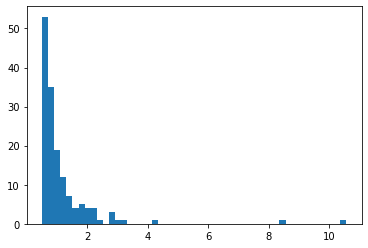

In [71]:
plt.hist(df_copy_high['Other_Sales'][df_copy_high['Other_Sales']>0.5],bins=50)

In [72]:
## 각 지역마다 판매량 상위권에 속하는 데이터만 다시 추출
df_copy_high = df_copy_high[(df_copy_high['NA_Sales']>=3) & (df_copy_high['EU_Sales']>=2) & (df_copy_high['JP_Sales']>=0.5) & (df_copy_high['Other_Sales']>=0.5) ].reset_index(drop=True)
df_copy_high
## 세계에서 가장 많은 판매량을 기록한건 Wii Sports


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77
2,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96
5,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26
6,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85
7,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55
8,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90
9,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00


In [73]:
df_copy_high.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,2004.405405,9.266486,6.174865,3.425676,1.594595
std,6.796484,7.881554,4.874376,2.066448,1.507674
min,1985.000000,3.010000,2.190000,0.600000,0.500000
25%,2001.000000,4.400000,3.110000,1.930000,0.700000
50%,2006.000000,6.420000,4.520000,3.120000,0.980000
75%,2009.000000,11.270000,8.590000,4.160000,2.150000
max,2014.000000,41.490000,29.020000,10.220000,8.460000


In [74]:
df_copy_high.Genre.value_counts()   ## 판매량 상위권에는 Platform 장르가 많음

Platform        9
Role-Playing    7
Racing          6
Sports          4
Misc            3
Action          3
Puzzle          2
Simulation      1
Fighting        1
Shooter         1
Name: Genre, dtype: int64

In [82]:
df_pub = df_copy.groupby('Publisher',as_index=False).sum().sort_values(by=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],ascending=False).reset_index(drop=True)
df_pub.head(20)

,Publisher,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Nintendo,1382632.0,802.57,407.06,441.58,92.85
1,Electronic Arts,2664506.0,578.58,364.76,13.98,126.78
2,Activision,1924950.0,424.94,213.09,6.54,74.51
3,Sony Computer Entertainment,1350960.0,259.94,183.42,73.26,78.30
4,Ubisoft,1827155.0,251.72,162.92,7.33,50.06
5,Take-Two Interactive,819308.0,218.72,116.60,5.82,54.73
6,THQ,1420288.0,207.62,94.22,5.01,32.00
7,Microsoft Game Studios,375263.0,154.98,68.41,3.26,18.51
8,Sega,1259386.0,108.51,81.19,54.87,24.21
9,Atari,690790.0,100.65,25.35,10.67,8.59


In [76]:
df_pub.describe()  ##  위의 head쪽 20개와 평균, 75% 보니까 상위 30개만 추려도 될듯함

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,5.730000e+02,573.000000,573.000000,573.000000,573.000000
mean,5.651553e+04,7.469250,4.149860,2.195829,1.358447
std,2.300299e+05,50.198416,27.948366,20.325615,8.892728
min,1.981000e+03,0.000000,0.000000,0.000000,0.000000
25%,2.010000e+03,0.000000,0.000000,0.000000,0.000000
50%,6.020000e+03,0.090000,0.040000,0.010000,0.010000
75%,2.010600e+04,0.750000,0.300000,0.180000,0.100000
max,2.664506e+06,802.570000,407.060000,441.580000,126.780000


In [77]:
df_pub = df_pub.iloc[:30]
df_pub

,Publisher,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Nintendo,1382632.0,802.57,407.06,441.58,92.85
1,Electronic Arts,2664506.0,578.58,364.76,13.98,126.78
2,Activision,1924950.0,424.94,213.09,6.54,74.51
3,Sony Computer Entertainment,1350960.0,259.94,183.42,73.26,78.30
4,Ubisoft,1827155.0,251.72,162.92,7.33,50.06
5,Take-Two Interactive,819308.0,218.72,116.60,5.82,54.73
6,THQ,1420288.0,207.62,94.22,5.01,32.00
7,Microsoft Game Studios,375263.0,154.98,68.41,3.26,18.51
8,Sega,1259386.0,108.51,81.19,54.87,24.21
9,Atari,690790.0,100.65,25.35,10.67,8.59


(array([10.,  5.,  5.,  2.,  0.,  1.,  0.,  2.,  0.,  2.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([ 11.82      ,  38.17833333,  64.53666667,  90.895     ,
        117.25333333, 143.61166667, 169.97      , 196.32833333,
        222.68666667, 249.045     , 275.40333333, 301.76166667,
        328.12      , 354.47833333, 380.83666667, 407.195     ,
        433.55333333, 459.91166667, 486.27      , 512.62833333,
        538.98666667, 565.345     , 591.70333333, 618.06166667,
        644.42      , 670.77833333, 697.13666667, 723.495     ,
        749.85333333, 776.21166667, 802.57      ]),
 <a list of 30 Patch objects>)

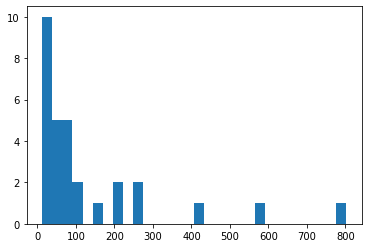

In [78]:
plt.hist(df_pub['NA_Sales'],bins=30)

In [79]:
## 가장 많은 매출을 기록한 상위 5개 Publisher만 살펴본다
## Nintendo /  Electronic Arts	/ Activision / Sony Computer Entertainment / Ubisoft
## 
df_pub5 = df_pub.iloc[:5].drop('Year',axis=1)
df_pub5

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Nintendo,802.57,407.06,441.58,92.85
1,Electronic Arts,578.58,364.76,13.98,126.78
2,Activision,424.94,213.09,6.54,74.51
3,Sony Computer Entertainment,259.94,183.42,73.26,78.30
4,Ubisoft,251.72,162.92,7.33,50.06


<Figure size 1440x504 with 0 Axes>

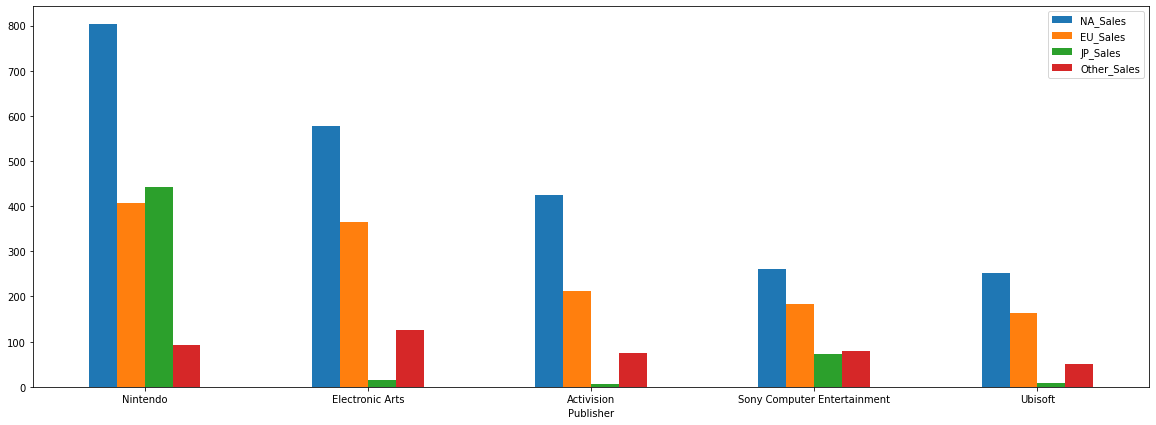

In [80]:
plt.figure(figsize=(20,7))
df_pub5.plot.bar(x='Publisher',rot=0,figsize=(20,7))  ## Nintendo, Electronic Arts

In [81]:
## 장르별 선호도 조사 결과 JP를 제외하고는 Action , Shooter,Sports 강세 였고, 지역별 매출량이 NA = 49.2 %   EU = 27.3%   JP = 14.5%   Other = 9% 였으므로
##  JP와 Other은 배제하고 NA,EU만 공략한다.
##  연도별 선호장르 조사결과 최근으로 갈수록 Action, Shooter, Sports 강세

## 위의 3가지를 공통적으로 만족하는 데이터를 추출
df2 = df_copy.drop(['JP_Sales','Other_Sales'],axis=1)
df2 = df2[(df2['Genre']=='Action') | (df2['Genre']=='Shooter') | (df2['Genre']=='Sports') ] 
df2 = df2[( (df2['Publisher']=='Nintendo') | df2['Publisher']=='Electronic Arts') | (df2['Publisher']=='Activision Publisher') | (df2['Publisher']=='Sony Computer Entertainment') | (df2['Publisher']=='Ubisoft')]    
df2 = df2.sort_values(by=['NA_Sales','EU_Sales','Name','Year'],ascending=False).reset_index(drop=True)   
df2.head(20)


## 결론적으로 '다음 분기에 어떤 게임을 설계해야 할까' 의 답으로는 Genre = Action 이고 , Publisher= 상위 5개판매량 회사에 속하면서 
##  비교적 최근에 NA와EU지역에서 잘팔렸던 Assassin's Creed 의 새로운 시리즈를 만들어서 판매하는게 좋다고 생각합니다

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales
0,Uncharted 2: Among Thieves,PS3,2009.0,Action,Sony Computer Entertainment,3.27,2.25
1,Assassin's Creed III,X360,2012.0,Action,Ubisoft,3.13,1.71
2,Assassin's Creed II,X360,2009.0,Action,Ubisoft,3.10,1.56
3,Assassin's Creed: Brotherhood,X360,2010.0,Action,Ubisoft,2.84,0.39
4,Uncharted 3: Drake's Deception,PS3,2011.0,Action,Sony Computer Entertainment,2.77,2.80
5,God of War III,PS3,2010.0,Action,Sony Computer Entertainment,2.74,1.36
6,God of War,PS2,2005.0,Action,Sony Computer Entertainment,2.71,1.29
7,Assassin's Creed III,PS3,2012.0,Action,Ubisoft,2.64,2.56
8,Assassin's Creed II,PS3,2009.0,Action,Ubisoft,2.54,1.95
9,SOCOM: U.S. Navy SEALs,PS2,2002.0,Shooter,Sony Computer Entertainment,2.53,0.81
